In [ ]:
import pandas as pd

df = pd.read_csv('/content/PAYTM.NS.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-18,1950.000000,1955.000000,1560.000000,1560.800049,1560.800049,23955434
1,2021-11-22,1509.000000,1519.000000,1271.000000,1359.599976,1359.599976,25114710
2,2021-11-23,1360.000000,1525.000000,1360.000000,1494.699951,1494.699951,12954174
3,2021-11-24,1503.000000,1785.000000,1502.949951,1752.449951,1752.449951,21541021
4,2021-11-25,1766.699951,1873.699951,1711.099976,1798.750000,1798.750000,13018344
...,...,...,...,...,...,...,...
331,2023-03-17,578.099976,585.549988,570.650024,578.349976,578.349976,4130620
332,2023-03-20,575.000000,576.849976,556.049988,559.200012,559.200012,2256904
333,2023-03-21,564.799988,586.250000,564.799988,583.900024,583.900024,4397948
334,2023-03-22,586.849976,629.400024,584.900024,624.049988,624.049988,12978431


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2021-11-18,1560.800049
1,2021-11-22,1359.599976
2,2021-11-23,1494.699951
3,2021-11-24,1752.449951
4,2021-11-25,1798.750000
...,...,...
331,2023-03-17,578.349976
332,2023-03-20,559.200012
333,2023-03-21,583.900024
334,2023-03-22,624.049988


In [ ]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2021-11-18,1560.800049
1,2021-11-22,1359.599976
2,2021-11-23,1494.699951
3,2021-11-24,1752.449951
4,2021-11-25,1798.750000
...,...,...
331,2023-03-17,578.349976
332,2023-03-20,559.200012
333,2023-03-21,583.900024
334,2023-03-22,624.049988


In [ ]:
df['Date']

0      2021-11-18
1      2021-11-22
2      2021-11-23
3      2021-11-24
4      2021-11-25
          ...    
331    2023-03-17
332    2023-03-20
333    2023-03-21
334    2023-03-22
335    2023-03-23
Name: Date, Length: 336, dtype: object

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2021-11-18')
datetime_object

datetime.datetime(2021, 11, 18, 0, 0)

In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0     2021-11-18
1     2021-11-22
2     2021-11-23
3     2021-11-24
4     2021-11-25
         ...    
331   2023-03-17
332   2023-03-20
333   2023-03-21
334   2023-03-22
335   2023-03-23
Name: Date, Length: 336, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2021-11-18,1560.800049
2021-11-22,1359.599976
2021-11-23,1494.699951
2021-11-24,1752.449951
2021-11-25,1798.750000
...,...
2023-03-17,578.349976
2023-03-20,559.200012
2023-03-21,583.900024


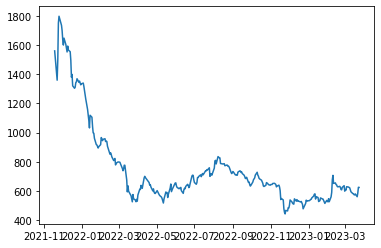

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2022-03-22'
windowed_df = df_to_windowed_df(df, 
                                '2022-03-23', 
                                '2023-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-03-23,597.049988,565.700012,544.000000,524.299988
1,2022-03-24,565.700012,544.000000,524.299988,574.349976
2,2022-03-25,544.000000,524.299988,574.349976,546.000000
3,2022-03-28,524.299988,574.349976,546.000000,535.549988
4,2022-03-29,574.349976,546.000000,535.549988,524.799988
...,...,...,...,...,...
246,2023-03-17,579.500000,572.849976,571.650024,578.349976
247,2023-03-20,572.849976,571.650024,578.349976,559.200012
248,2023-03-21,571.650024,578.349976,559.200012,583.900024
249,2023-03-22,578.349976,559.200012,583.900024,624.049988


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((251,), (251, 3, 1), (251,))

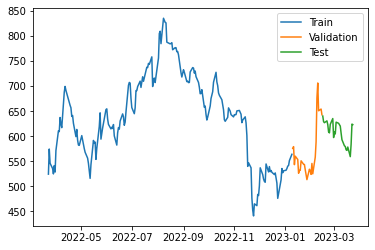

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 76ms/step - loss: 411253.4062 - mean_absolute_error: 635.4827 - val_loss: 325665.4062 - val_mean_absolute_error: 568.2504
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 410573.7500 - mean_absolute_error: 634.9465 - val_loss: 324971.5938 - val_mean_absolute_error: 567.6395
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 409666.5312 - mean_absolute_error: 634.2367 - val_loss: 324120.4062 - val_mean_absolute_error: 566.8897
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 408755.0312 - mean_absolute_error: 633.5106 - val_loss: 323238.7500 - val_mean_absolute_error: 566.1112
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 407666.5625 - mean_absolute_error: 632.6558 - val_loss: 322134.0938 - val_mean_absolute_error: 565.1349
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 406329.1875 - mean_absolute_error: 631.5981 - val_lo

7/7 [==============================] - 0s 2ms/step


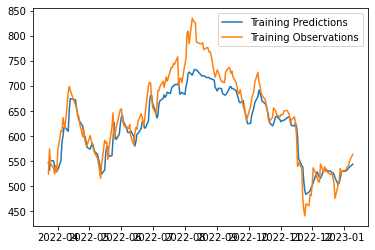

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 18ms/step


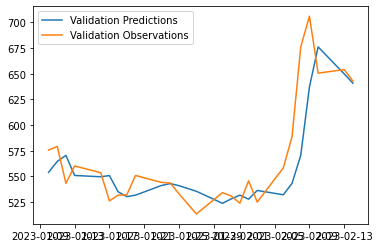

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 17ms/step


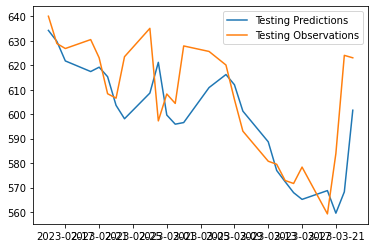

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

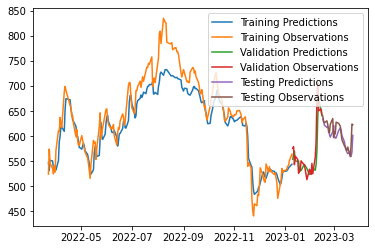

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 18ms/step


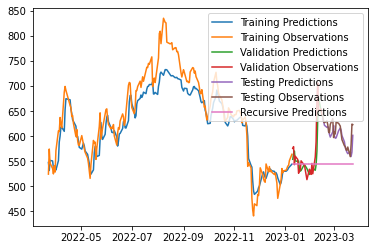

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])